## **1. High Dimensional Data and Overfitting**

* **High dimensional data** is a dataset in which <u> the number of variables is larger than the number of observations. </u> If a dataset has $p$ variables and $n$ observations and $p > n$, then this dataset is high dimensional data. In machine learning literature, independent variables are also called **predictors,** **covariates**, **attributes** or **features**. In this course, we will refer to them as **independent variables.**

In Module 1, we talked about using principal component analysis or factor analysis, two data dimension reduction tools to solve high dimensional data issues. You first run either PCA or factor analysis to decide what variables to keep and run the linear regression model after you decide on the independent variables from PCA or factor analysis. 

In this lesson, we will introduce a different general method to handle the problem of too many variables: **penalized regression.** 

When we have too many variables and use all of them to build a linear regression model, we run the risk of overfitting the model. In an OLS regression model, we try to minimize **residual sum of squares (RSS)**, which the following objective function:

$$RSS(\beta_0, \beta_1) = \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta_{p}X_{pi})^{2} $$

In the OLS objective function, we can see there is no restriction on how many $\beta$ (also independent variables) there are in the function. What if we assign some sort of penalty to each additional $\beta$ every time we add one new independent variable? Penalized regression uses an objective function like the following:

$$ \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta_{p} X_{pi})^{2} + \lambda \sum_{j=1}^{p} f(\beta_j) $$

where $f(.)$ is called a **regularization function** or **penalty function**. A **penalty function** will try to pull the value of a coefficient close to $0$ if the value is too large. <u> The function basically tries to reduce the impact of an independent variable in the model if the coefficient of this independent variable is too large. </u> It is a function that penalizes the existence of an independent variable in a model by suppressing the value of its coefficient. In an extreme case, this function may pull the coefficient to $0$. When the coefficient is $0$, it means the independent variable is removed from the model. The action of pulling a coefficient value towards $0$ or to a certain preset value is called **shrinkage**, in that you shrink a coefficient.


* What is $\lambda$? 

$\lambda$ is a **regularization parameter**. It controls the **trade-off of variance and bias** for coefficients. What does this mean? In an ideal model, we would like to achieve an accuracy for the estimated coefficients that is as high as possible and standard errors as low as possible for such estimated coefficients.

In OLS, the estimated coefficients are unbiased, which means they are accurate. However, the variance of the coefficients can be very high if there are too many variables in the model, as we argued in the previous section. <u> An **OLS** objective function provides accurate (unbiased) coefficient estimates but not stable estimates (high variance). </u> On the other hand, a **penalty function** can suppress the coefficient estimates from going too far away from $0$. We can see from the penalized regression objective function that there is the original OLS objective function as well as a penalty function. An OLS objective function gives accurate coefficient estimates with high variance. <u> With the addition of the penalty function to the penalized regression objective function, this objective function will produce coefficient estimates with lower variance. However, the coefficient estimates from penalized regression will be biased. </u>

Why does a penalized regression objective function produce biased coefficient estimates? Because <u> its ability to pull coefficient estimates closer to $0$ will prevent the model from fully minimizing the sum of the distances from the regression line to all data points. </u> This is also the reason we have the penalty function in the penalized regression objective function. We don't want to put too much emphasis on the noisy part of the data.

So how can we balance the trade-off between bias and variance of the estimated coefficients? We use $\lambda$ to balance the two forces. We can use a graph to illustrate the impact of the value of $\lambda$ on total error:

**Figure 2: Trade-Off Graph between Variance and Bias in Penalized Regression**

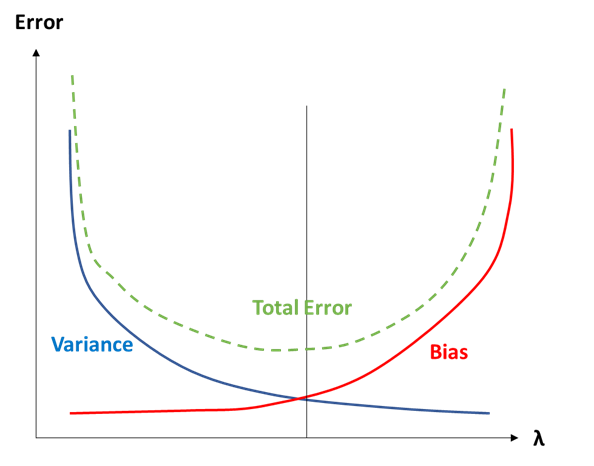


From Figure 2, we can see that as $\lambda$ goes to $0$, the error from variance gets larger and the error from bias gets smaller and vice versa. We would like to find the middle point of $\lambda$ that will give us the lowest total error. So how can we find the optimal $\lambda$?

* Before moving on to discuss how to find the optimal $\lambda$, there are steps we need to take to prepare the dataset before we model. <u> The first thing is that the penalty function shouldn't include the intercept, $\beta_{0}$. In general, we don't penalize $\beta_{0}$. </u>

* Another important step to take is that of <u> standardizing all independent variables $\large(\frac{x_i}{\sqrt{Var(X_i)}})$. </u> We talked about how the penalty function will pull the value of a coefficient closer to $0$ if the value is too large. In order for this action to make sense, all independent variables need to be standardized <u> to remove the fact that they could have different **scales**. </u>

Some statistical software packages may conduct independent variable standardization automatically while running a penalized regression. Please check the manual for the specific software package you decide to use for more information.

#### **2.2.4 K-Fold Cross Validation to Find Optimal $\lambda$**